In [1]:
import pandas as pd
import seaborn as sns
import spacy
import matplotlib.pyplot as plt

nlp = spacy.load('en')

In [2]:
essay_key = pd.read_csv('../data/essays_dataset/index.csv', sep=';')
essay_key.head()

,filename,prompt,grade
0,1004355.txt,Do you agree or disagree with the following st...,low
1,1007363.txt,Do you agree or disagree with the following st...,low
2,1079196.txt,Do you agree or disagree with the following st...,high
3,1086343.txt,Do you agree or disagree with the following st...,low
4,1096747.txt,Do you agree or disagree with the following st...,low


In [3]:
essay_key['prompt'].value_counts()

Do you agree or disagree with the following statement?\t\tMost advertisements make products seem much better than they really are.\t\tUse specific reasons and examples to support your answer.\t                                      21
Do you agree or disagree with the following statement?\t\tIn twenty years, there will be fewer cars in use than there are today.\t\tUse reasons and examples to support your answer.\t                                                 17
Do you agree or disagree with the following statement?\t\tYoung people nowadays do not give enough time to helping their communities.\t\tUse specific reasons and examples to support your answer.\t                                   16
Do you agree or disagree with the following statement?\t\tSuccessful people try new things and take risks rather than only doing what they already know how to do well.\t\tUse reasons and examples to support your answer.\t          15
Do you agree or disagree with the following statement?\t\tIt is 

In [4]:
essays = []
for filename in essay_key['filename']:
    with open('../data/essays_dataset/essays/'+filename, 'r') as f:
        essays.append(f.read().strip())
        
essay_key['essay'] = essays
essay_key.head()

,filename,prompt,grade,essay
0,1004355.txt,Do you agree or disagree with the following st...,low,This is an important aspect of today time.\nTh...
1,1007363.txt,Do you agree or disagree with the following st...,low,A geat challenge in a person's life span is hi...
2,1079196.txt,Do you agree or disagree with the following st...,high,"Personally, I agree with the statement saying ..."
3,1086343.txt,Do you agree or disagree with the following st...,low,In many country their are many combanies of a...
4,1096747.txt,Do you agree or disagree with the following st...,low,I disagree with this idea. in order to make a ...


In [9]:
print(essay_key.loc[0,'essay'])

This is an important aspect of today time.
This products rathen are not much better, but today is not important the really character of the product, but only the money and the client not rappresented the important actor in this process.
Every day any people buy same products that is not rappresented the your necessity, but is only important buy any product.
To explain this argoment in my nation, at the television, there is an program that discuss of the problem rappresented by this.
More people go to this program television to talk about your problem, that is very radicate in my nation.
The modern society rappresented the perfect ambient to influenced the minds of all the person.
In my self is present the reasons of this statement, that is one of the problem of the life.
But not all the people and the time is in accord with this problem, because any time the person is too according with the make products.
Thus I agree with this statement, because this event is present in my life every 

In [7]:
doc = nlp(essay_key.loc[0,'essay'])

In [8]:
doc[-7].prefix_, doc[-7].suffix_

('n', 'new')

In [19]:
i=12
doc[i].text, doc[i].lemma_, doc[i].pos_, doc[i].tag_, doc[i].is_oov, doc[i].is_stop, doc[i].is_punct, doc[i].has_vector, doc[i].idx

('rathen', 'rathen', 'NOUN', 'NN', True, False, False, True, 57)

In [17]:
generate_label(doc, 'the', 'misspelling')

0 the
1 the
2 the
3 the
4 the
5 the
6 the
7 the
8 The
9 the
10 the
11 the
12 the
13 the
14 the
15 the
16 the
17 the
18 the
19 the
20 the
21 The
22 the
23 the
24 the
25 the
26 the
27 The
28 the
29 the
30 the
31 the
32 the
33 The
34 the


('the', 660, 663, 'misspelling')

In [16]:
def generate_label(doc, word, label):
    matches = list()
    for token in doc:
        if token.lower_ == word:
            matches.append(token)
    
    if len(matches) == 1:
        return (matches[0].text, matches[0].idx, matches[0].idx + len(matches[0].text), label)
    else:
        for i,m in enumerate(matches):
            print(i, m)
        choice = int(input('Choose a match (number): '))
        return (matches[choice].text, matches[choice].idx, matches[choice].idx + len(matches[choice].text), label)

In [18]:
essay_key.loc[0,'essay'][660:663]

'the'

In [15]:
essay_len = list()
for doc in essay_key['essay']:
    doc = nlp(doc)
    essay_len.append(len([token for token in doc if not token.is_punct]))
    
essay_key['essay_len'] = essay_len

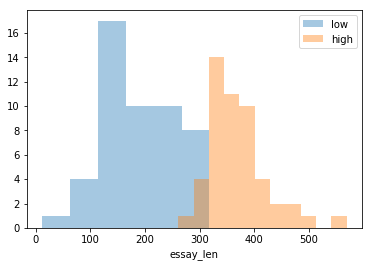

In [22]:
sns.distplot(essay_key.loc[lambda df: df['grade'] == 'low', 'essay_len'], kde=False, label='low')
sns.distplot(essay_key.loc[lambda df: df['grade'] == 'high', 'essay_len'], kde=False, label='high')
plt.legend()

# NLTK

In [28]:
import os
from nltk.parse.stanford import StanfordNeuralDependencyParser, StanfordParser

In [40]:
java_path = 'D:/Program Files/Java/jdk-9.0.4/bin/java.exe'
corenlp_path = 'D:/Users/john/My Documents/stanford-corenlp-full-2017-06-09'
os.environ['JAVAHOME'] = java_path

#StanfordNeuralDependencyParser()
parser = StanfordParser(path_to_jar=corenlp_path+'/stanford-corenlp-3.8.0.jar', 
                        path_to_models_jar=corenlp_path+'/stanford-corenlp-3.8.0-models.jar')

In [12]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.parse.corenlp import CoreNLPParser
from nltk.tag.stanford import CoreNLPNERTagger
from nltk.tag.stanford import CoreNLPPOSTagger

parser = CoreNLPParser(url='http://localhost:9000')
pos_tagger = CoreNLPPOSTagger(url='http://localhost:9000')

In [11]:
sent_list = sent_tokenize(essay_key.loc[0,'essay'])
len(sent_list)

14

In [44]:
for i in sent_list:
    for j in parser.raw_parse(i):
        print(j)
    print('###############################')

(ROOT
  (S
    (NP (DT This))
    (VP
      (VBZ is)
      (NP
        (NP (DT an) (JJ important) (NN aspect))
        (PP (IN of) (NP (NN today) (NN time)))))
    (. .)))
###############################
(ROOT
  (S
    (S
      (NP (DT This) (NNS products) (NN rathen))
      (VP (VBP are) (RB not) (ADJP (RB much) (JJR better))))
    (, ,)
    (CC but)
    (S
      (NP (NN today))
      (VP
        (VBZ is)
        (RB not)
        (ADJP
          (JJ important)
          (SBAR
            (S
              (NP
                (NP (DT the) (ADVP (RB really)) (NN character))
                (PP
                  (IN of)
                  (NP
                    (NP (DT the) (NN product))
                    (, ,)
                    (CONJP (CC but) (RB only))
                    (NP
                      (NP (DT the) (NN money))
                      (CC and)
                      (NP (DT the) (NN client))))))
              (RB not)
              (VP
                (VBD rappresented)
   

In [45]:
asdf = parser.raw_parse(sent_list[0])

In [48]:
for i in asdf:
    asdf2 = i
    break

In [69]:
for s in asdf2.subtrees(lambda t: t.height() == 8):
    print(s)

(ROOT
  (S
    (NP (DT This))
    (VP
      (VBZ is)
      (NP
        (NP (DT an) (JJ important) (NN aspect))
        (PP (IN of) (NP (NN today) (NN time)))))
    (. .)))


In [20]:
tokens = parser.tokenize(essay_key.loc[0,'essay'])
tags = pos_tagger.tag(tokens)

In [16]:
for i in tokens:
    print(i)

This
is
an
important
aspect
of
today
time
.
This
products
rathen
are
not
much
better
,
but
today
is
not
important
the
really
character
of
the
product
,
but
only
the
money
and
the
client
not
rappresented
the
important
actor
in
this
process
.
Every
day
any
people
buy
same
products
that
is
not
rappresented
the
your
necessity
,
but
is
only
important
buy
any
product
.
To
explain
this
argoment
in
my
nation
,
at
the
television
,
there
is
an
program
that
discuss
of
the
problem
rappresented
by
this
.
More
people
go
to
this
program
television
to
talk
about
your
problem
,
that
is
very
radicate
in
my
nation
.
The
modern
society
rappresented
the
perfect
ambient
to
influenced
the
minds
of
all
the
person
.
In
my
self
is
present
the
reasons
of
this
statement
,
that
is
one
of
the
problem
of
the
life
.
But
not
all
the
people
and
the
time
is
in
accord
with
this
problem
,
because
any
time
the
person
is
too
according
with
the
make
products
.
Thus
I
agree
with
this
statement
,
because
this
event
is
present


In [21]:
tags

[('This', 'DT'),
 ('is', 'VBZ'),
 ('an', 'DT'),
 ('important', 'JJ'),
 ('aspect', 'NN'),
 ('of', 'IN'),
 ('today', 'NN'),
 ('time', 'NN'),
 ('.', '.'),
 ('This', 'DT'),
 ('products', 'NNS'),
 ('rathen', 'NN'),
 ('are', 'VBP'),
 ('not', 'RB'),
 ('much', 'RB'),
 ('better', 'JJR'),
 (',', ','),
 ('but', 'CC'),
 ('today', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('important', 'JJ'),
 ('the', 'DT'),
 ('really', 'RB'),
 ('character', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('product', 'NN'),
 (',', ','),
 ('but', 'CC'),
 ('only', 'RB'),
 ('the', 'DT'),
 ('money', 'NN'),
 ('and', 'CC'),
 ('the', 'DT'),
 ('client', 'NN'),
 ('not', 'RB'),
 ('rappresented', 'VBD'),
 ('the', 'DT'),
 ('important', 'JJ'),
 ('actor', 'NN'),
 ('in', 'IN'),
 ('this', 'DT'),
 ('process', 'NN'),
 ('.', '.'),
 ('Every', 'DT'),
 ('day', 'NN'),
 ('any', 'DT'),
 ('people', 'NNS'),
 ('buy', 'VBP'),
 ('same', 'JJ'),
 ('products', 'NNS'),
 ('that', 'WDT'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('rappresented', 'VBN'),
 ('the', 'DT'),

In [5]:
from nltk.corpus import treebank

print(treebank.fileids()) # doctest: +ELLIPSIS
print(treebank.words('wsj_0003.mrg'))
print(treebank.tagged_words('wsj_0003.mrg'))
print(treebank.parsed_sents('wsj_0003.mrg')[0])

['wsj_0001.mrg', 'wsj_0002.mrg', 'wsj_0003.mrg', 'wsj_0004.mrg', 'wsj_0005.mrg', 'wsj_0006.mrg', 'wsj_0007.mrg', 'wsj_0008.mrg', 'wsj_0009.mrg', 'wsj_0010.mrg', 'wsj_0011.mrg', 'wsj_0012.mrg', 'wsj_0013.mrg', 'wsj_0014.mrg', 'wsj_0015.mrg', 'wsj_0016.mrg', 'wsj_0017.mrg', 'wsj_0018.mrg', 'wsj_0019.mrg', 'wsj_0020.mrg', 'wsj_0021.mrg', 'wsj_0022.mrg', 'wsj_0023.mrg', 'wsj_0024.mrg', 'wsj_0025.mrg', 'wsj_0026.mrg', 'wsj_0027.mrg', 'wsj_0028.mrg', 'wsj_0029.mrg', 'wsj_0030.mrg', 'wsj_0031.mrg', 'wsj_0032.mrg', 'wsj_0033.mrg', 'wsj_0034.mrg', 'wsj_0035.mrg', 'wsj_0036.mrg', 'wsj_0037.mrg', 'wsj_0038.mrg', 'wsj_0039.mrg', 'wsj_0040.mrg', 'wsj_0041.mrg', 'wsj_0042.mrg', 'wsj_0043.mrg', 'wsj_0044.mrg', 'wsj_0045.mrg', 'wsj_0046.mrg', 'wsj_0047.mrg', 'wsj_0048.mrg', 'wsj_0049.mrg', 'wsj_0050.mrg', 'wsj_0051.mrg', 'wsj_0052.mrg', 'wsj_0053.mrg', 'wsj_0054.mrg', 'wsj_0055.mrg', 'wsj_0056.mrg', 'wsj_0057.mrg', 'wsj_0058.mrg', 'wsj_0059.mrg', 'wsj_0060.mrg', 'wsj_0061.mrg', 'wsj_0062.mrg', 'wsj_00